# Detecting **Name** and **National Id**

### Importing and installing Dependencies

In [4]:
! pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [6]:
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Fine Tune** the tesseract model with the Arabic Characters

In [8]:
!cp /content/drive/MyDrive/ID_Card_Extraction/Data/OCR_traindata/ara.traineddata /usr/share/tesseract-ocr/4.00/tessdata/ 

In [9]:
def resize_ara_num(img):
    '''
    Input: Image
    Operation: Resizing 
    Output: resized image
    '''
    #scale_percent = 50  # percent of original size
    width = 1280
    height = 819
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

### One Image Trial without Preprocessing

(822, 1280, 3)


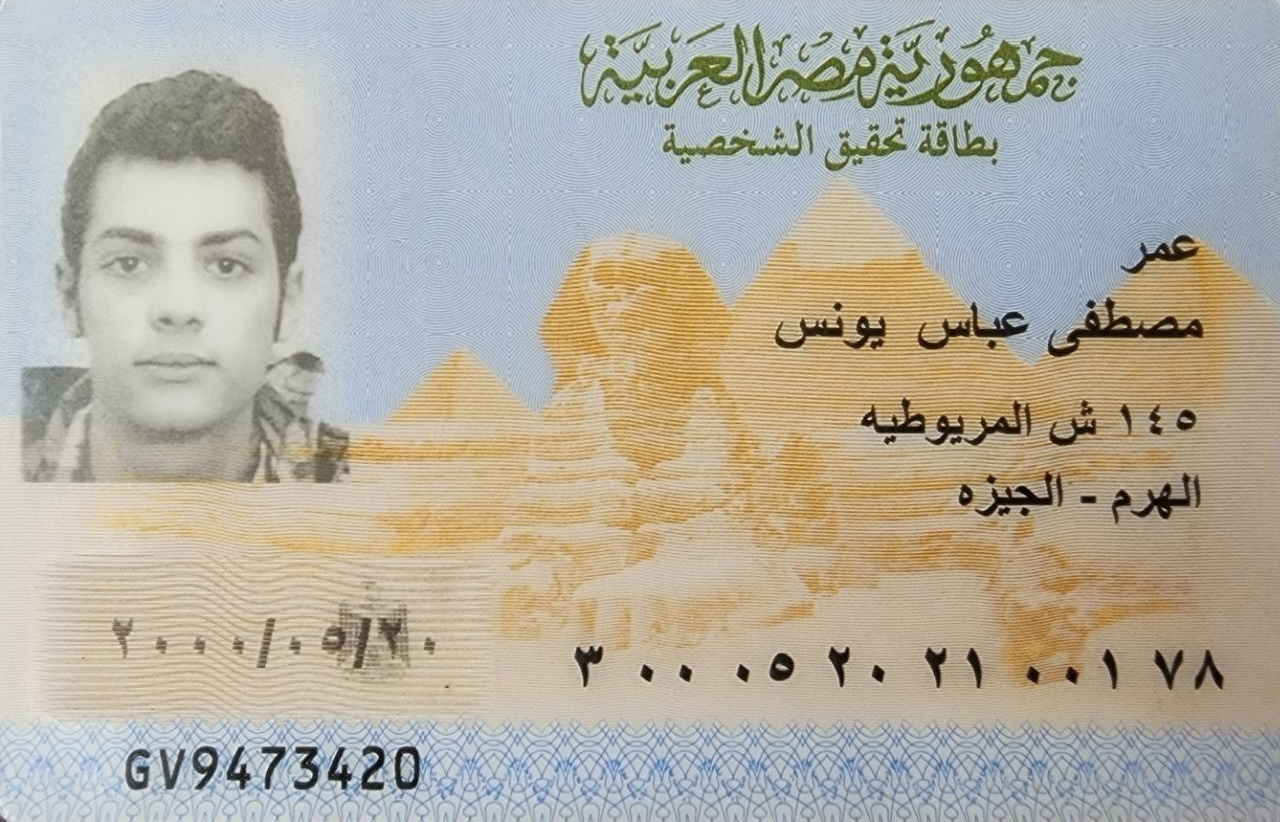




(819, 1280, 3)


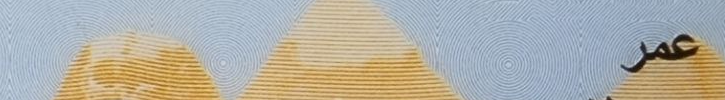

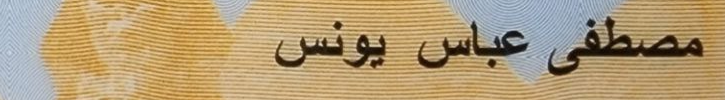

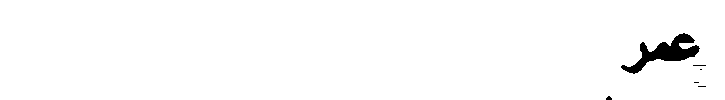

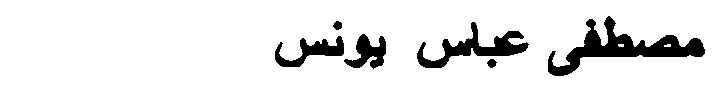

In [19]:
img = cv2.imread('/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f12.jpg')
print(img.shape)
cv2_imshow(img)
print('\n\n')
img = resize_ara_num(img)
print(img.shape)

# Cropping first name 
first_name = img[200:300, 500:1225]
cv2_imshow(first_name)
print('\n')
cv2.imwrite("first_name.jpg", first_name)

# Cropping last name 
last_name = img[280:380, 500:1225]


print('\n')
cv2_imshow(last_name)
cv2.imwrite("last_name.jpg", last_name)
print('\n')

# Preprocessing first name
first_gray = cv2.cvtColor(first_name, cv2.COLOR_BGR2GRAY)
(first_thresh, first_blackAndWhite) = cv2.threshold(first_gray, 120, 255, cv2.THRESH_BINARY)

blur = cv2.GaussianBlur(first_blackAndWhite,(5,5),10)
ret3,th_first = cv2.threshold(blur,10,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Preprocessing last name
last_gray = cv2.cvtColor(last_name, cv2.COLOR_BGR2GRAY)
(last_thresh, last_blackAndWhite) = cv2.threshold(last_gray, 120, 255, cv2.THRESH_BINARY)


blur = cv2.GaussianBlur(last_blackAndWhite,(5,5),10)
ret3,th_last = cv2.threshold(blur,10,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



cv2.imwrite("th_first.jpg", th_first)
cv2.imwrite("th_last.jpg", th_last)
print('\n\n\n\n')
# cv2_imshow(last_blackAndWhite)
# cv2_imshow(th3)
cv2_imshow(th_first)
cv2_imshow(th_last)

In [12]:
!pip install ArabicOcr

In [22]:
from ArabicOcr import arabicocr
image_path= '/content/mora.jpg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):	
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))

[INFO] OCR'ing input image...
[INFO] 0.6600: عباس   يونس
[INFO] 0.7267: مصطنى
[INFO] 0.3528: عمر
[[[[174, 123], [511, 123], [511, 203], [174, 203]], 'عباس   يونس', 0.6599826245648847], [[[504, 92], [732, 92], [732, 215], [504, 215]], 'مصطنى', 0.7267317483728918], [[[608.2185469050424, 19.230478239161474], [720.806058489737, 8.089797343646548], [723.7814530949576, 70.76952176083853], [611.193941510263, 81.91020265635345]], 'عمر', 0.3527625501155853]]


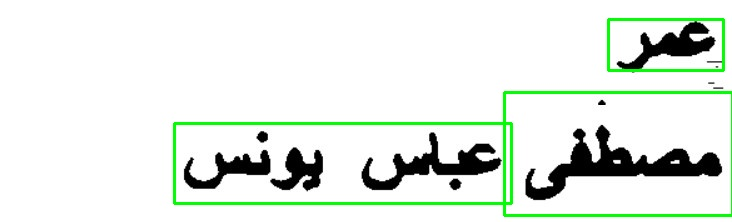

In [23]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('out.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [24]:
# First name detection -- احمد
f_name = pytesseract.image_to_string(th_first, lang="ara")
# Last name detection -- عبدالوهاب محمد زيدان محمد
l_name = pytesseract.image_to_string(th_last, lang="ara")

In [33]:
f_name[:-2] # 

''

In [31]:
l_name[:-2]

'مصطفى عباس يونس'

### After Preprocessing

In [19]:
# import the modules
import os
from os import listdir

# get the path/directory
ids = '/content/drive/MyDrive/ID_Card_Extraction/Data/ID'
list_images = []

# /content/drive/MyDrive/ID_Card_Extraction/faces/ + f00.jpg
for images in os.listdir(ids):
    print(images)

    shaped_images = os.path.join(ids, images)
    list_images.append(shaped_images)

f00.jpg
f01.jpg
f02.jpg
f03.jpg
f04.jpg
f05.jpg
f07.jpg
f08.jpg
f09.jpg
f10.jpg
f11.jpg
f12.jpg
f06.jpg


In [20]:
list_images

['/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f00.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f01.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f02.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f03.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f04.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f05.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f07.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f08.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f09.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f10.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f11.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f12.jpg',
 '/content/drive/MyDrive/ID_Card_Extraction/Data/ID/f06.jpg']

In [21]:
names = []
for img_path in (list_images):
    img = cv2.imread(img_path)
    img = resize_ara_num(img)
    
    # Cropping first name 
    first_name = img[215:300, 800:1225]
    cv2.imwrite("first_name.jpg", first_name)

    # Cropping last name 
    last_name = img[280:380, 500:1225]
    cv2.imwrite("last_name.jpg", last_name)

    # Extracting names
    fname = pytesseract.image_to_string(first_name, lang="ara")
    lname = pytesseract.image_to_string(last_name, lang="ara")

    full_name = fname[:-2] +" "+lname[:-2]
    names.append(full_name)

In [22]:
names # 800 color

[' الوهاب محمد زيدان مخمد - )4\nعبدالو !',
 ' رفيق تاوضروس دميان',
 ' أشرف متولى حسن',
 ' حتفى محمد حامذ',
 ' محمد احمد عبدالوارث',
 'حذيفه زكى اسماعيل زكى',
 ' ',
 'أروى عصام سعد عيد ً لجو أذ',
 '   اسمير عبدالقادر عبدالعليم طايل - -',
 ' احمد لطفى هاشم كيلانى',
 '-<كريم عماد فاروق مصطفى',
 ' مصطفى عباس يونس',
 'عبدالرحمن احمد منصوز بدران\n\nو']

In [23]:
names # 500 color

[' الوهاب محمد زيدان مخمد - )4\nعبدالو !',
 ' رفيق تاوضروس دميان',
 ' أشرف متولى حسن',
 ' حتفى محمد حامذ',
 ' محمد احمد عبدالوارث',
 'حذيفه زكى اسماعيل زكى',
 ' ',
 'أروى عصام سعد عيد ً لجو أذ',
 '   اسمير عبدالقادر عبدالعليم طايل - -',
 ' احمد لطفى هاشم كيلانى',
 '-<كريم عماد فاروق مصطفى',
 ' مصطفى عباس يونس',
 'عبدالرحمن احمد منصوز بدران\n\nو']

In [24]:
''' 
First name and last name are cropped into 2 seperate images, 
the first name is of smaller widths, 
each is turned into black and white

'''
names = []
for img_path in (list_images):
    img = cv2.imread(img_path)
    img = resize_ara_num(img)
    
    # Cropping first name 
    first_name = img[215:300, 800:1225]

    # Cropping last name 
    last_name = img[280:380, 500:1225]

    # Preprocessing first name
    first_gray = cv2.cvtColor(first_name, cv2.COLOR_BGR2GRAY)
    (first_thresh, first_blackAndWhite) = cv2.threshold(first_gray, 100, 255, cv2.THRESH_BINARY)

    # Preprocessing last name
    last_gray = cv2.cvtColor(last_name, cv2.COLOR_BGR2GRAY)
    (last_thresh, last_blackAndWhite) = cv2.threshold(last_gray, 100, 255, cv2.THRESH_BINARY)

    # Extracting first name
    fname = pytesseract.image_to_string(first_blackAndWhite, lang="ara")

    # Extracting last name
    lname = pytesseract.image_to_string(last_blackAndWhite, lang="ara")
    
    full_name = fname[:-2] +" "+lname[:-2]
    names.append(full_name)

In [25]:
names # 800 Black and white

[' عبدالوهاب محمد ز\nمحمد زيدان محمد',
 ' روس دميان\nرفيق تاوضروس',
 ' أشرف متولى حسن',
 ' حنفى محمد حامد',
 'نور محمد احمد عبدالوارث',
 'ب زكى اسماعيل زكى',
 ' ',
 'أروى عصام سعد عبد أ لجو اد',
 ' سمير عبدالقادر عبدالعليم طايل . .',
 ' احمد لطفى هاشم كيلانى',
 'كريم عماد فاروق مصطفى',
 ' مصطفى عباس يونس',
 'عبدالرحمن احمد منصور بدران']

In [ ]:
df = pd.DataFrame({"names": names})

In [ ]:
df

,names
0,مصطفى عباس يونس
1,كريم عماد فاروق مصطفى
2,احمد لطفى هاشم كيلانى
3,ب زكى اسماعيل زكى
4,نور محمد احمد عبدالوارث
5,أروى عصام سعد عبد أ لجو اد
6,عبدالرحمن احمد منصور بدران
7,سمير عبدالقادر عبدالعليم طايل . .
8,حنفى محمد حامد
9,


In [ ]:
names = []
for img_path in (list_images):
    img = cv2.imread(img_path)
    img = resize_ara_num(img)
    
    # Cropping first name 
    first_name = img[215:380, 500:1225]

    # Extracting names
    fname = pytesseract.image_to_string(first_name, lang="ara")

    full_name = fname[:-2]
    names.append(full_name)

In [ ]:
names #full name one pic color

['سعد عبدالجواد\nعام',
 '',
 'زكى اسماعيل زكى',
 'مصطفى عباس يونس',
 'دميان\n\n7\n\nميان\nرفيق تاوضرّوس 0',
 'ميار\n\nنَ\n\nحنفى محمد حامد\nم*',
 'احمد لطفى هاشم كيلانى',
 ' ',
 'احمد\nعبدالوهاب محمد زيدان محمد',
 'تور\nمحمد احمد عبدالوارث',
 'عبدالرحمن\nاحمد منصور بدران',
 '27\nشرف ب\nمتولى',
 ' ']

### **Extracting Numbers**

In [ ]:
!cp /content/drive/MyDrive/ID_Card_Extraction/Data/OCR_traindata/arabic_numbers.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [ ]:
''' 
First name and last name are cropped into 2 seperate images, 
the first name is of smaller widths, 
each is turned into black and white

'''
ids = []
for img_path in (list_images):
    img = cv2.imread(img_path)
    img = resize_ara_num(img)
    
    # Cropping first name 
    id = img[500:560, 400:1000]


    # Preprocessing first name
    id_gray = cv2.cvtColor(id, cv2.COLOR_BGR2GRAY)
    (first_thresh, id_blackAndWhite) = cv2.threshold(id, 100, 255, cv2.THRESH_BINARY)

    
    # Extracting last name
    id = pytesseract.image_to_string(id_blackAndWhite, lang="arabic_numbers")
    

    ids.append(id)

In [ ]:
final_df = pd.DataFrame()

In [ ]:
df.to_csv(r'IDS.csv', index=False, header = True)

In [ ]:
df

,IDs
0,٢٩٩١١٠٣١٦٠٠٦٣٦
1,٣٠٠٠٧١٢٢٦٠١٩٣٤
2,٣٠٠٠٩٠٦١٧٠٠٣٢٥
3,٢٩٩٠٩٢٨١٤٠٣٠٨٤
4,٣٠٠٠٩٠١٢١١٠٧٠٩
5,٢٩٩٠٦٠٧٢١٠٠٧٧٦
6,٢٩٩٠٨٢٩٠١٠٣٢٩١
7,٢٩٩٠٨١٠٠١٠٣٠٤٥
8,٣٠٠٠١١٨١٤٠١٩٠٨
9,٣٠٠٠٦٢٧٢١٠٣٢٢٧


In [ ]:
final_df["Names"] = names

In [ ]:
final_df

,IDs,Names
0,٢٩٩١١٠٣١٦٠٠٦٣٦,عبدالوهاب محمد ز\nمحمد زيدان محمد
1,٣٠٠٠٧١٢٢٦٠١٩٣٤,حنفى محمد حامد
2,٣٠٠٠٩٠٦١٧٠٠٣٢٥,مصطفى عباس يونس
3,٢٩٩٠٩٢٨١٤٠٣٠٨٤,
4,٣٠٠٠٩٠١٢١١٠٧٠٩,نور محمد احمد عبدالوارث
5,٢٩٩٠٦٠٧٢١٠٠٧٧٦,ب زكى اسماعيل زكى
6,٢٩٩٠٨٢٩٠١٠٣٢٩١,أروى عصام سعد عبد أ لجو اد
7,٢٩٩٠٨١٠٠١٠٣٠٤٥,روس دميان\nرفيق تاوضروس
8,٣٠٠٠١١٨١٤٠١٩٠٨,عبدالرحمن احمد منصور بدران
9,٣٠٠٠٦٢٧٢١٠٣٢٢٧,احمد لطفى هاشم كيلانى


In [ ]:
final_df.to_csv(r'Arabic_OCR.csv', index=False, header = True)

In [ ]:
!cp /content/Arabic_OCR.csv /content/drive/MyDrive